In [4]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Display basic information
df.info()

# Display first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40450 entries, 0 to 40449
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Unnamed: 0                                         40450 non-null  int64 
 1   Date                                               40450 non-null  int64 
 2   Vehicle Category                                   40450 non-null  object
 3   GVWR Class                                         40450 non-null  object
 4   Fuel Type                                          40450 non-null  object
 5   Model Year                                         40450 non-null  int64 
 6   Fuel Technology                                    40450 non-null  object
 7   Electric Mile Range                                40450 non-null  object
 8   Number of Vehicles Registered at the Same Address  40450 non-null  object
 9   Region           

,Unnamed: 0,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,0,2019,P,Not Applicable,Gasoline,2020,ICE,Not Applicable,≥4,Statewide,395883
1,1,2019,T6,7,Diesel,1996,ICE,Not Applicable,1,Statewide,70
2,2,2019,T6,7,Diesel,1993,ICE,Not Applicable,1,Statewide,70
3,3,2019,T6,6,Diesel,1986,ICE,Not Applicable,≥4,Statewide,70
4,4,2019,T4,Unknown,Diesel,1992,ICE,Not Applicable,≥4,Statewide,70


In [6]:
# Check for missing values
print("Missing Values Per Column:\n", df.isna().sum())

# Drop rows with missing Model Year
df = df.dropna(subset=["Model Year"])

# Convert Model Year to integer
df["Model Year"] = df["Model Year"].astype(int)

Missing Values Per Column:
 Unnamed: 0                                           0
Date                                                 0
Vehicle Category                                     0
GVWR Class                                           0
Fuel Type                                            0
Model Year                                           0
Fuel Technology                                      0
Electric Mile Range                                  0
Number of Vehicles Registered at the Same Address    0
Region                                               0
Vehicle Population                                   0
dtype: int64


In [7]:
# Check for duplicate rows
print("Duplicate Rows: ", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

Duplicate Rows:  0


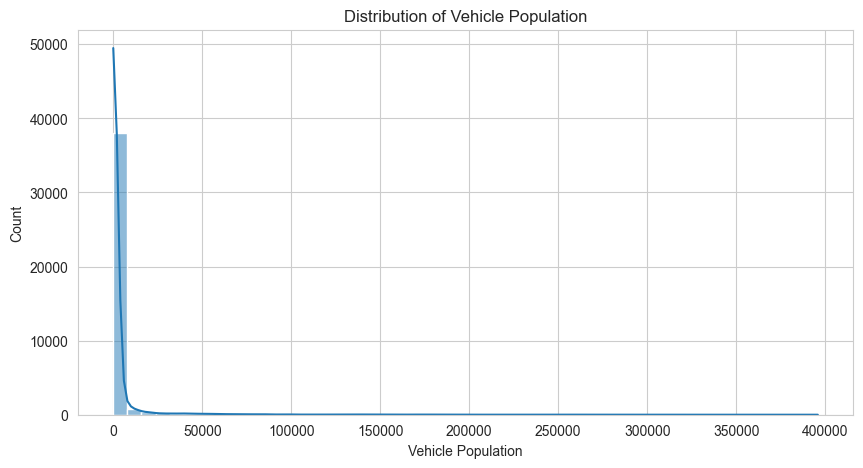

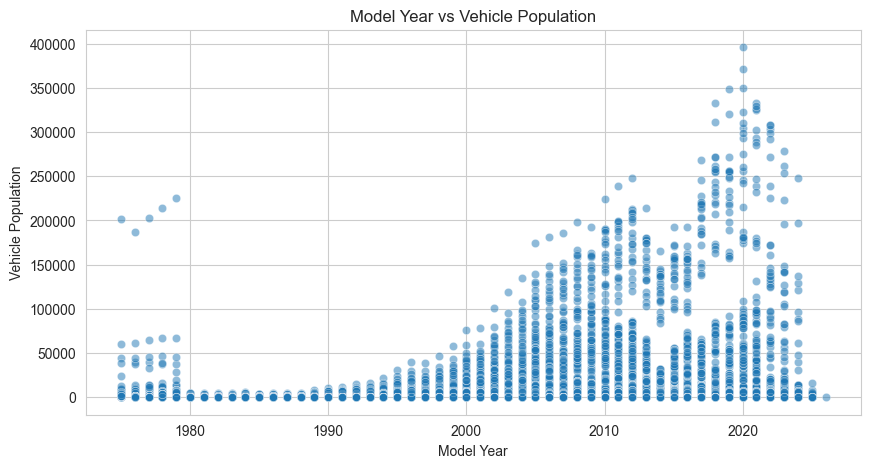

In [8]:
# Distribution of Vehicle Population
plt.figure(figsize=(10,5))
sns.histplot(df["Vehicle Population"], bins=50, kde=True)
plt.title("Distribution of Vehicle Population")
plt.show()

# Scatter plot: Model Year vs Vehicle Population
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Model Year"], y=df["Vehicle Population"], alpha=0.5)
plt.title("Model Year vs Vehicle Population")
plt.show()

In [9]:
# Create Vehicle Age feature
df["Vehicle Age"] = df["Date"] - df["Model Year"]

# Convert categorical variables into numerical form
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
# Split data
X = df_encoded.drop(columns=["Vehicle Population"])
y = df_encoded["Vehicle Population"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [11]:
# Use Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_encoded["Anomaly_Score"] = iso_forest.fit_predict(df_encoded[["Vehicle Population"]])

# Show detected anomalies
anomalies = df_encoded[df_encoded["Anomaly_Score"] == -1]
print("Total Anomalies Detected:", anomalies.shape[0])
anomalies.head()

Total Anomalies Detected: 404


,Unnamed: 0,Date,Model Year,Vehicle Population,Vehicle Age,Vehicle Category_BS,Vehicle Category_BT,Vehicle Category_MC,Vehicle Category_MH,Vehicle Category_P,...,Electric Mile Range_101 to 150 miles,Electric Mile Range_51 to 100 miles,Electric Mile Range_>150 miles,Electric Mile Range_Not Applicable,Electric Mile Range_Unknown,Number of Vehicles Registered at the Same Address_2,Number of Vehicles Registered at the Same Address_3,Number of Vehicles Registered at the Same Address_Unknown,Number of Vehicles Registered at the Same Address_≥4,Anomaly_Score
0,0,2019,2020,395883,-1,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,-1
6689,6689,2019,2007,124875,12,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,-1
6700,6700,2019,2008,125541,11,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,-1
6705,6705,2019,2015,126203,4,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,-1
6716,6716,2019,2009,124463,10,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,-1


In [12]:
# Evaluate Gradient Boosting Model
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting - MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("Gradient Boosting - R² Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting - MAE: 3848.128272182109
Gradient Boosting - RMSE: 9963.988119808984
Gradient Boosting - R² Score: 0.6251326526672041


In [15]:
# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)

# Compute Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.4f}")

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 283.95
Root Mean Squared Error (RMSE): 1404.52
R² Score: 0.9926
